In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# import inspector to find columns names for table MEASUREMENT
inspector = inspect(engine)
measurement_column = inspector.get_columns('measurement')
for c in measurement_column:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#import inspect to find columns name for table STATION
station_column = inspect(engine).get_columns('station')
for c in station_column:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Recent Date
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [12]:
# # Perform a query to retrieve the data and precipitation scores
# prcp_query=session.query(Measurement.date, func.avg(Measurement.prcp)).\
#     filter(Measurement.date>=last_12months).group_by(Measurement.date).all()
# prcp_query

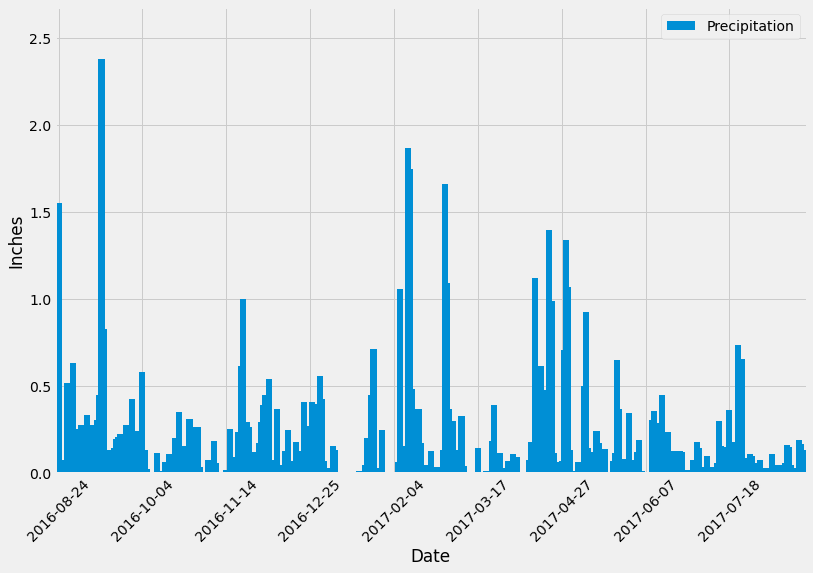

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
    ##recent_date_dt= dt.datetime.strptime(recent_date, '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
last_12months = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
    #last_12months
# Perform a query to retrieve the data and precipitation scores
prcp_query=session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date>=last_12months).group_by(Measurement.date).all()
    
# Save the query results as a Pandas DataFrame and set the index to the date column
values_df = pd.DataFrame(prcp_query, columns=['Date', 'Precipitation'])
    #values_df
values_df.set_index('Date', inplace=True)
# Sort the dataframe by date
values_df = pd.DataFrame.sort_index(values_df)

# Use Pandas Plotting with Matplotlib to plot the data
ax = values_df.plot(kind='bar', width=3, figsize=(12,8), rot=45)
plt.ylabel('Inches')
plt.locator_params(axis='x', nbins=9)
plt.ylim(0,max(values_df['Precipitation'])+.3)
plt.savefig('Images/Precipitation.png')
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
values_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_idcount= session.query(Station).group_by(Station.station).count()
station_idcount

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_query= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act_station = station_query[0][0]
active_station= session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
    func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()

(lowest_temp, highest_temp, avg_temp) = active_station[0]

print(f'The lowest temperature is {lowest_temp}.') 
print(f'The highest temperature is {highest_temp}.')
print(f'The average temperature is {avg_temp}.')

The lowest temperature is 54.0.
The highest temperature is 85.0.
The average temperature is 71.66378066378067.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_12mnth = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date>=last_12months).\
    filter(Measurement.station =='USC00519281').all()

temp_12mnth_df =pd.DataFrame(temp_12mnth, columns=['station', 'tobs'])
temp_12mnth_df.set_index('station', inplace=True)
temp_12mnth_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


<function matplotlib.pyplot.show(close=None, block=None)>

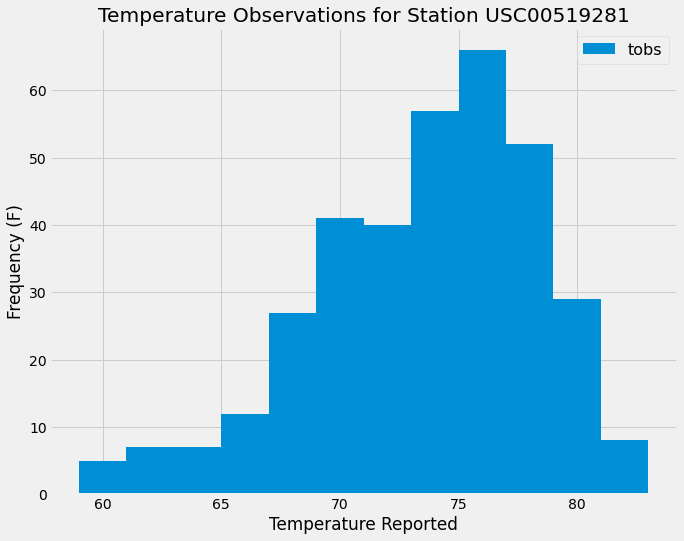

In [19]:
#plot histogram
temp_12mnth_df.plot.hist(bins=12, figsize=(10,8))
plt.title('Temperature Observations for Station '+ most_act_station)
plt.xlabel('Temperature Reported')
plt.ylabel('Frequency (F)')
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("Images/StationTemps.png")
plt.show

# Close session

In [20]:
# Close Session
session.close()

## BONUS:  TEMPERATURE ANALYSIS 1

In [21]:
import pandas as pd
from datetime import datetime as dt

In [22]:
# "tobs" is "temperature observations"
measuree_df = pd.read_csv('Resources/hawaii_measurements.csv')
measuree_df.info()
measuree_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19550 non-null  object 
 1   date     19550 non-null  object 
 2   prcp     18103 non-null  float64
 3   tobs     19550 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 611.1+ KB


,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [23]:
station_df=pd.read_csv('Resources/hawaii_stations.csv')
station_df.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [24]:
# Convert the date column format from string to datetime
measuree_df= pd.DataFrame(measuree_df)
measuree_df['date'] = pd.to_datetime(measuree_df['date'])
measuree_df.info('date')
measuree_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [25]:
# Set the date column as the DataFrame index
measuree_df.set_index('date', inplace=True)
measuree_df
#date_df.info()
#date_df.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [26]:
# Drop the date column
measuree_df.reset_index()
#measuree_df.index =measuree_df.index.date
measuree_df.info()
measuree_df.head()

#del measure_df['date']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19550 entries, 2010-01-01 to 2017-08-23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19550 non-null  object 
 1   prcp     18103 non-null  float64
 2   tobs     19550 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 610.9+ KB


,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


### Compare June and December data across all years 

In [27]:
from scipy import stats

In [28]:
# Identify the average temperature for June
avg_june_tem_list = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime('%m', Measurement.date) =='06').all()
average_june_temp = list(np.ravel(avg_june_tem_list))[0]
print (f' The average temperature in June across all years is {avg_june_tem_list} F.')


 The average temperature in June across all years is [(74.94411764705882,)] F.


In [29]:
# Identify the average temperature for December
avg_dec_tem_list = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date.like("%-12-%")).scalar()
print (f' The average temperature in December across all years is {avg_dec_tem_list} F.')


 The average temperature in December across all years is 71.04152933421226 F.


In [30]:
# Create collections of temperature data
june_temp_list = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "06").all()

june_tmp_list = list(np.ravel(june_temp_list))

# Remove nulls (if any)
clean_june_tmp_list = []
for temp in june_tmp_list: 
    if temp != None : 
        clean_june_tmp_list.append(temp)

dec_temp_list = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "12").all()

dec_tmp_list = list(np.ravel(dec_temp_list))

# Remove nulls (if any)
clean_dec_tmp_list = []
for temp in dec_tmp_list: 
    if temp != None : 
        clean_dec_tmp_list.append(temp)

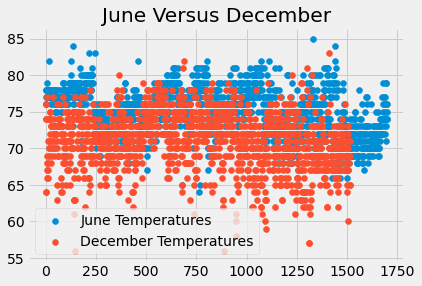

In [31]:
# Run paired t-test
# Scatter Plot of Data
plt.subplot(1, 1, 1)
plt.scatter(range(len(clean_june_tmp_list)), clean_june_tmp_list, label="June Temperatures")
plt.scatter(range(len(clean_dec_tmp_list)), clean_dec_tmp_list, label="December Temperatures")
plt.legend()
plt.title("June Versus December")
plt.savefig("Images/June vs December Scatter Plot.png")
plt.show()

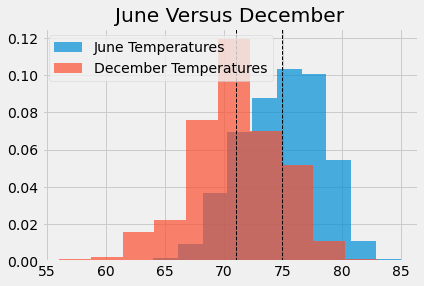

In [32]:
# Histogram Plot of Data
plt.subplot(1, 1, 1)
plt.hist(clean_june_tmp_list, 10, density=True, alpha=0.7, label="June Temperatures")
plt.hist(clean_dec_tmp_list, 10, density=True, alpha=0.7, label="December Temperatures")
plt.axvline(np.mean(clean_june_tmp_list), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(clean_dec_tmp_list), color='k', linestyle='dashed', linewidth=1)
plt.legend()

plt.title("June Versus December")
plt.savefig("Images/june_dec_histogram.png")
plt.show()

In [33]:
from scipy import stats
stats.ttest_ind(june_tmp_list, dec_tmp_list, equal_var=False)


Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

It is a statistically significant difference in means (p-value of less than 0.05).
Very small value - means of these two populations are significantly different.
lower probability that the difference is random.
Reject the null hypothesis.
null hypothesis - there is no meaningful difference between the temperature in June and December in Hawaii.